##Machine Learning o Aprendizaje Automático

"El aprendizaje automático es un subcampo de la informática que brinda a las computadoras la capacidad de aprender sin ser programadas explícitamente“ - Arthur Samuel

Use Machine Learning para las siguientes situaciones:

*   Cuando el desarrollador (humano) no puede codificar las reglas
*   Cuando el esfuerzo humano no puede escalar al volumen de datos mientras que una máquina sí puede.





---
#Aprendizaje supervisado - Ejemplo - Arbol de decisión


Leemos los datos desde un archivo CSV

In [2]:
#from google.colab import files
#data_to_load = files.upload()


Convertimos los datos en un *dataframe* de pandas. Este formato es muy útil para realizar todo tipo de operaciones sobre los datos

In [2]:
import io
import pandas as pd

df = pd.read_csv('3 arbol de decision.csv')
#df = pd.read_csv(io.BytesIO(data_to_load['arbol de decision.csv']))

In [3]:
df

,ID,Temperatura,Humedad,Ventoso,Pronóstico,Salir a entrenar
0,1,Cálido,Alta,No,Lluvia,No
1,2,Cálido,Alta,Sí,Lluvia,No
2,3,Cálido,Alta,No,Nublado,Si
3,4,Templado,Alta,No,Soleado,Si
4,5,Fresco,Normal,No,Soleado,Si
5,6,Fresco,Normal,Sí,Soleado,No
6,7,Fresco,Normal,Sí,Nublado,Si
7,8,Templado,Alta,No,Lluvia,No
8,9,Fresco,Normal,No,Lluvia,Si
9,10,Templado,Normal,No,Soleado,Si


Ya que nuestros modelos sólo comprenden números, convertimos las categorías

In [6]:
#df['Temperatura_num'] = df['Temperatura'].replace(['Cálido','Templado','Fresco'],[2,1,0],inplace=True)
df['Temperatura_num'] = df['Temperatura'].replace( {'Cálido': 2, 
                                                    'Templado': 1,
                                                    'Fresco':0})

C:\Users\carlos\AppData\Local\Temp\ipykernel_15916\2553274297.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Temperatura_num'] = df['Temperatura'].replace( {'Cálido': 2,


In [7]:
df

,ID,Temperatura,Humedad,Ventoso,Pronóstico,Salir a entrenar,Temperatura_num
0,1,Cálido,Alta,No,Lluvia,No,2
1,2,Cálido,Alta,Sí,Lluvia,No,2
2,3,Cálido,Alta,No,Nublado,Si,2
3,4,Templado,Alta,No,Soleado,Si,1
4,5,Fresco,Normal,No,Soleado,Si,0
5,6,Fresco,Normal,Sí,Soleado,No,0
6,7,Fresco,Normal,Sí,Nublado,Si,0
7,8,Templado,Alta,No,Lluvia,No,1
8,9,Fresco,Normal,No,Lluvia,Si,0
9,10,Templado,Normal,No,Soleado,Si,1


In [8]:
#df['Humedad_num'] = df['Humedad'].replace(['Alta','Normal'],[1,0])
df['Humedad_num'] = df['Humedad'].replace({'Alta':1,'Normal':0})
#df['Ventoso_num'] = df['Ventoso'].replace(['No','Sí'],[0,1])
df['Ventoso_num'] = df['Ventoso'].replace({'No':0, 'Sí':1})
#df['Pronostico_num'] = df['Pronóstico'].replace(['Lluvia','Nublado','Soleado'],[2,1,0])
df['Pronostico_num'] = df['Pronóstico'].replace({'Lluvia':2, 'Nublado':1, 'Soleado':0})
#df['Entrenar_num'] = df['Salir a entrenar'].replace(['No','Si'],[0,1])
df['Entrenar_num'] = df['Salir a entrenar'].replace({'No':0, 'Si':1})

C:\Users\carlos\AppData\Local\Temp\ipykernel_15916\713082406.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Humedad_num'] = df['Humedad'].replace({'Alta':1,'Normal':0})
C:\Users\carlos\AppData\Local\Temp\ipykernel_15916\713082406.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ventoso_num'] = df['Ventoso'].replace({'No':0, 'Sí':1})
C:\Users\carlos\AppData\Local\Temp\ipykernel_15916\713082406.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

In [9]:
df

,ID,Temperatura,Humedad,Ventoso,Pronóstico,Salir a entrenar,Temperatura_num,Humedad_num,Ventoso_num,Pronostico_num,Entrenar_num
0,1,Cálido,Alta,No,Lluvia,No,2,1,0,2,0
1,2,Cálido,Alta,Sí,Lluvia,No,2,1,1,2,0
2,3,Cálido,Alta,No,Nublado,Si,2,1,0,1,1
3,4,Templado,Alta,No,Soleado,Si,1,1,0,0,1
4,5,Fresco,Normal,No,Soleado,Si,0,0,0,0,1
5,6,Fresco,Normal,Sí,Soleado,No,0,0,1,0,0
6,7,Fresco,Normal,Sí,Nublado,Si,0,0,1,1,1
7,8,Templado,Alta,No,Lluvia,No,1,1,0,2,0
8,9,Fresco,Normal,No,Lluvia,Si,0,0,0,2,1
9,10,Templado,Normal,No,Soleado,Si,1,0,0,0,1


*No* siempre la codificación es tan simple. En algunos casos debemos utilizar una técnica que se llama *one-hot encoding*

In [10]:
from sklearn.tree import DecisionTreeClassifier

Tenemos que separar las variables de entrada (features) de la variable objetivo (target)

In [11]:
feature_cols = ['Temperatura_num','Humedad_num','Ventoso_num','Pronostico_num']
X = df[feature_cols] # Variables de entrada
y = df['Entrenar_num'] # Variable objetivo

In [12]:
X

,Temperatura_num,Humedad_num,Ventoso_num,Pronostico_num
0,2,1,0,2
1,2,1,1,2
2,2,1,0,1
3,1,1,0,0
4,0,0,0,0
5,0,0,1,0
6,0,0,1,1
7,1,1,0,2
8,0,0,0,2
9,1,0,0,0


Normalmente, si el conjunto de datos es suficientemente grande, se separa una parte (80%) para entrenar el modelo y el resto se reserva para probarlo

In [13]:
clf = DecisionTreeClassifier()


¡Una sola línea de cóódigo para entrenar el modelo!

In [14]:
clf = clf.fit(X,y)


Con el modelo entrenado, podemos predecir el resultado de cualquier combinación de entradas

In [15]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [16]:
df['Entrenar_prediccion'] = y_pred
df

,ID,Temperatura,Humedad,Ventoso,Pronóstico,Salir a entrenar,Temperatura_num,Humedad_num,Ventoso_num,Pronostico_num,Entrenar_num,Entrenar_prediccion
0,1,Cálido,Alta,No,Lluvia,No,2,1,0,2,0,0
1,2,Cálido,Alta,Sí,Lluvia,No,2,1,1,2,0,0
2,3,Cálido,Alta,No,Nublado,Si,2,1,0,1,1,1
3,4,Templado,Alta,No,Soleado,Si,1,1,0,0,1,1
4,5,Fresco,Normal,No,Soleado,Si,0,0,0,0,1,1
5,6,Fresco,Normal,Sí,Soleado,No,0,0,1,0,0,0
6,7,Fresco,Normal,Sí,Nublado,Si,0,0,1,1,1,1
7,8,Templado,Alta,No,Lluvia,No,1,1,0,2,0,0
8,9,Fresco,Normal,No,Lluvia,Si,0,0,0,2,1,1
9,10,Templado,Normal,No,Soleado,Si,1,0,0,0,1,1


Matriz de confusión

Matriz de confusion


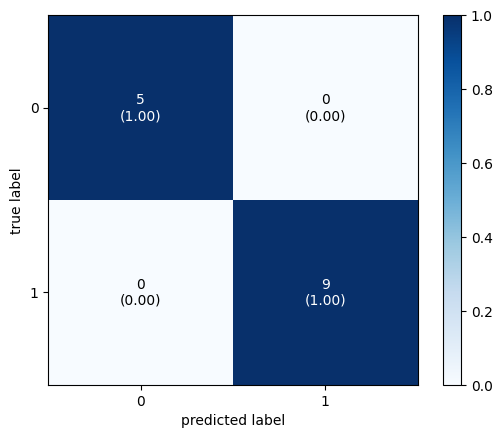

In [21]:
#from sklearn.metrics import plot_confusion_matrix
#import matplotlib.pyplot as plt
#disp = plot_confusion_matrix(clf, X, y,display_labels=['No', 'Sí'],cmap=plt.cm.Blues)
#disp.ax_.set_title('Matriz de Confusión')
#print()
#print(disp.confusion_matrix)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

print('Matriz de confusion')
cml = confusion_matrix(y,y_pred)
plot_confusion_matrix(conf_mat=cml,show_absolute = True, show_normed = True, colorbar = True)
plt.show()

Podemos predecir una combinación que el árbol de decisión nunca vió en su entrenamiento

Temperatura: Cálido

Humedad: Alta

Ventoso: Sí 	

Pronóstico: Lluvia


In [22]:
import numpy as np

desconocido = np.array([2,1,1,0])
desconocido = desconocido.reshape(1, -1)


In [23]:
y_pred_desconocido = clf.predict(desconocido)
y_pred_desconocido

c:\CPE\CPEDS\envWindows\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

¿Cómo es un árbol de decisión?

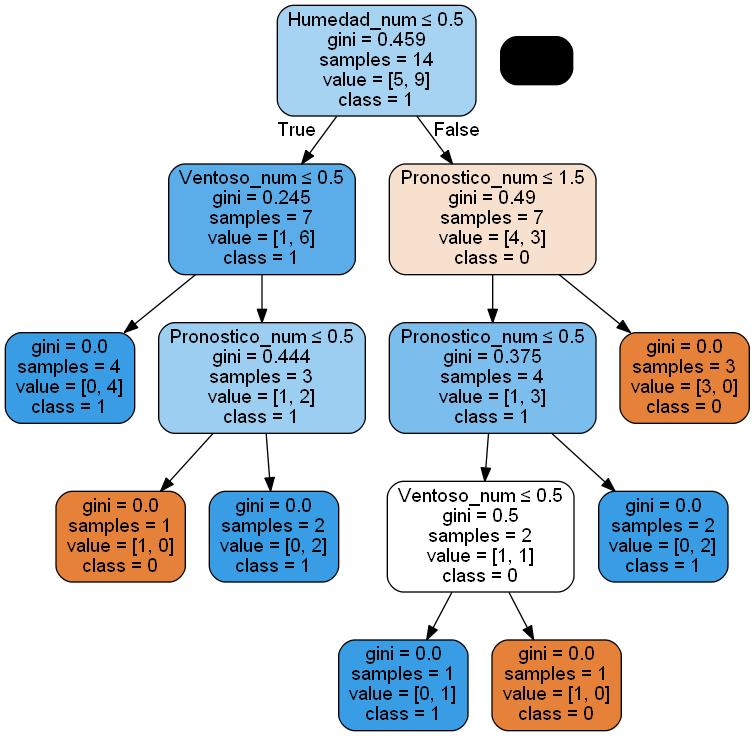

In [25]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

[Text(0.5, 0.9, 'Humedad_num <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = 1'),
 Text(0.2, 0.7, 'Ventoso_num <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = 1'),
 Text(0.35, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.3, 0.5, 'Pronostico_num <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.8, 0.7, 'Pronostico_num <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = 0'),
 Text(0.65, 0.8, '  False'),
 Text(0.7, 0.5, 'Pronostico_num <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = 1'),
 Text(0.6, 0.3, 'Ventoso_num <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.8, 0.3, 'gini =

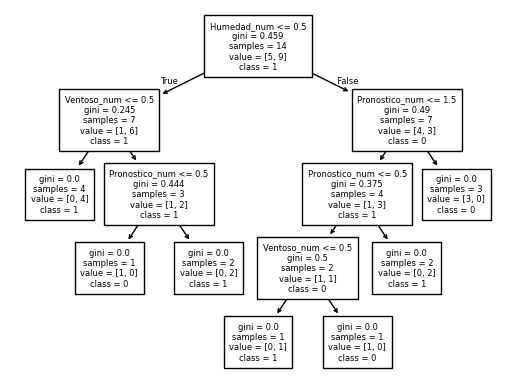

In [26]:
from sklearn import tree
tree.plot_tree(clf,feature_names = feature_cols,class_names = ['0','1'], fontsize = 6)